In [1]:
import os
import re
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import json
from datetime import datetime
from dateutil.relativedelta import relativedelta
# sns.set()
# sns.set_style("whitegrid", {'grid.linestyle': '--'})
# sns.set_context("paper", 1.5, {"lines.linewidth": 4})
# sns.set_palette("winter_r", 8, 1)
# sns.set_context("paper", 1.5)
# sns.set('paper','whitegrid', font_scale=3, rc={"lines.linewidth": 3, 'grid.linestyle': '--'})

In [2]:
local_dir = "./ray_results/compare-action-2"
expt_names = glob.glob(os.path.join(local_dir, "*_*"))
expt_names

['./ray_results/compare-action-2\\A2C_2021-11-19_15-17_BuySell',
 './ray_results/compare-action-2\\A2C_2021-11-19_15-23_LongNeutralShort',
 './ray_results/compare-action-2\\DQN_2021-11-19_02-47_BuySell',
 './ray_results/compare-action-2\\DQN_2021-11-19_03-01_LongNeutralShort',
 './ray_results/compare-action-2\\PPO_2021-11-19_03-27_BuySell',
 './ray_results/compare-action-2\\PPO_2021-11-19_03-46_LongNeutralShort',
 './ray_results/compare-action-2\\SAC_2021-11-19_04-06_BuySell',
 './ray_results/compare-action-2\\SAC_2021-11-19_05-30_LongNeutralShort']

In [3]:
target_records = ["episode_reward_mean", "evaluation/episode_reward_mean", "timesteps_total"]

summary_expt = {}
for expt_name in expt_names:
    algo = expt_name.split("_")[-4][-3:]
    actions = expt_name.split("_")[-1]
    trials = glob.glob(os.path.join(expt_name, "ExperimentCV_*"))
    
    summary_trials = {}
    for trial in trials:
        with open(os.path.join(trial, "params.json"), 'r') as f:
            params = json.load(f)
        train_start = datetime.strptime(params["_train_start"], "%Y-%m-%d") + relativedelta(years=params["__trial_index__"])
        eval_start = datetime.strptime(params["_train_start"], "%Y-%m-%d") + relativedelta(years=params["__trial_index__"] + params["_train_years"])
        column_name = f"{train_start.year}(+{params['_train_years']}) | {eval_start.year}(+{params['_eval_years']})"
        
        progress = pd.read_csv(os.path.join(trial, "progress.csv"))
        summary_trials[column_name] = progress[target_records]
    
    summary_trials = pd.concat(summary_trials, axis=1)
    # print(summary_trials)
    summary_expt[f"{algo}_{actions}"] = summary_trials
    # reward_mean_df["mean"] = reward_mean_df.mean(axis=1)
    # reward_mean_df["std"] = reward_mean_df.std(axis=1)
    # summary_progress[algo][actions]["epidoe_reward_mean"] = reward_mean_df
    # summary_progress[algo][actions]["evalution/epidoe_reward_mean"] = eval_reward_mean_df
    # print(reward_mean_df)
summary_expt = pd.concat(summary_expt, axis=1)
summary_expt

A2C_BuySell                                                 \
   2010(+5) | 2015(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.110871                       0.142570          5040.0   
1            -0.122956                       0.116125         35280.0   
2            -0.095229                       0.121555         65520.0   
3            -0.080942                       0.175621         95760.0   
4            -0.045994                       0.134317        126000.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            NaN             NaN   
12                 NaN                            NaN             NaN   
13                 NaN                            NaN             NaN   
14                 NaN                            NaN             NaN   
15                 NaN                            NaN             NaN   
16                 NaN                            NaN             NaN   
17                 NaN                            NaN             NaN   
18                 NaN                            NaN             NaN   
19                 NaN                            NaN             NaN   

                                                                       \
   2011(+5) | 2016(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.315759                       0.032578          5040.0   
1            -0.189921                      -0.120313         30240.0   
2            -0.173332                      -0.186254         60480.0   
3            -0.142748                      -0.008097         90720.0   
4            -0.081617                       0.023347        120960.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            NaN             NaN   
12                 NaN                            NaN             NaN   
13                 NaN                            NaN             NaN   
14                 NaN                            NaN             NaN   
15                 NaN                            NaN             NaN   
16                 NaN                            NaN             NaN   
17                 NaN                            NaN             NaN   
18                 NaN                            NaN             NaN   
19                 NaN                            NaN             NaN   

                                                                       \
   2012(+5) | 2017(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.368669                      -0.164669          5040.0   
1            -0.269491                      -0.100726         35280.0   
2            -0.241083                      -0.118032         60480.0   
3            -0.193315                      -0.252590         90720.0   
4            -0.159109                      -0.201669        120960.0   
5                  NaN                            NaN             N

In [69]:
summary_expt

A2C_BuySell                                                 \
   2010(+5) | 2015(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.110871                       0.142570          5040.0   
1            -0.122956                       0.116125         35280.0   
2            -0.095229                       0.121555         65520.0   
3            -0.080942                       0.175621         95760.0   
4            -0.045994                       0.134317        126000.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            NaN             NaN   
12                 NaN                            NaN             NaN   
13                 NaN                            NaN             NaN   
14                 NaN                            NaN             NaN   
15                 NaN                            NaN             NaN   
16                 NaN                            NaN             NaN   
17                 NaN                            NaN             NaN   
18                 NaN                            NaN             NaN   
19                 NaN                            NaN             NaN   

                                                                       \
   2011(+5) | 2016(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.315759                       0.032578          5040.0   
1            -0.189921                      -0.120313         30240.0   
2            -0.173332                      -0.186254         60480.0   
3            -0.142748                      -0.008097         90720.0   
4            -0.081617                       0.023347        120960.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            NaN             NaN   
12                 NaN                            NaN             NaN   
13                 NaN                            NaN             NaN   
14                 NaN                            NaN             NaN   
15                 NaN                            NaN             NaN   
16                 NaN                            NaN             NaN   
17                 NaN                            NaN             NaN   
18                 NaN                            NaN             NaN   
19                 NaN                            NaN             NaN   

                                                                       \
   2012(+5) | 2017(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.368669                      -0.164669          5040.0   
1            -0.269491                      -0.100726         35280.0   
2            -0.241083                      -0.118032         60480.0   
3            -0.193315                      -0.252590         90720.0   
4            -0.159109                      -0.201669        120960.0   
5                  NaN                            NaN             N

In [58]:
for column in summary_expt.columns:
    print(summary_expt.loc[: , pd.IndexSlice[column[0]]])

   2010(+5) | 2015(+1)                                                 \
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.110871                       0.142570          5040.0   
1            -0.122956                       0.116125         35280.0   
2            -0.095229                       0.121555         65520.0   
3            -0.080942                       0.175621         95760.0   
4            -0.045994                       0.134317        126000.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            N

In [55]:
pd.MultiIndex.drop_duplicates
summary_expt.columns.drop_duplicates().values
summary_expt.columns.droplevel(level=[1, 2]).drop_duplicates()
summary_expt.columns.droplevel(level=[1, 2]).drop_duplicates()
# summary_expt.columns.get_level_values(0)

MultiIndex([(         'A2C_BuySell',            'episode_reward_mean'),
            (         'A2C_BuySell', 'evaluation/episode_reward_mean'),
            (         'A2C_BuySell',                'timesteps_total'),
            ('A2C_LongNeutralShort',            'episode_reward_mean'),
            ('A2C_LongNeutralShort', 'evaluation/episode_reward_mean'),
            ('A2C_LongNeutralShort',                'timesteps_total'),
            (         'DQN_BuySell',            'episode_reward_mean'),
            (         'DQN_BuySell', 'evaluation/episode_reward_mean'),
            (         'DQN_BuySell',                'timesteps_total'),
            ('DQN_LongNeutralShort',            'episode_reward_mean'),
            ('DQN_LongNeutralShort', 'evaluation/episode_reward_mean'),
            ('DQN_LongNeutralShort',                'timesteps_total'),
            (         'PPO_BuySell',            'episode_reward_mean'),
            (         'PPO_BuySell', 'evaluation/episode_reward_

In [38]:
index = pd.MultiIndex
summary_expt.columns.drop_duplicates().values
summary_expt.columns.get_loc("A2C_BuySell")
summary_expt.loc[:, pd.IndexSlice[:]]
# summary_expt.columns.values
# print(summary_expt.xs('2010(+5) | 2015(+1)', axis=1, level=2))

A2C_BuySell                                                 \
   2010(+5) | 2015(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.110871                       0.142570          5040.0   
1            -0.122956                       0.116125         35280.0   
2            -0.095229                       0.121555         65520.0   
3            -0.080942                       0.175621         95760.0   
4            -0.045994                       0.134317        126000.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            NaN             NaN   
12                 NaN                            NaN             NaN   
13                 NaN                            NaN             NaN   
14                 NaN                            NaN             NaN   
15                 NaN                            NaN             NaN   
16                 NaN                            NaN             NaN   
17                 NaN                            NaN             NaN   
18                 NaN                            NaN             NaN   
19                 NaN                            NaN             NaN   

                                                                       \
   2011(+5) | 2016(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.315759                       0.032578          5040.0   
1            -0.189921                      -0.120313         30240.0   
2            -0.173332                      -0.186254         60480.0   
3            -0.142748                      -0.008097         90720.0   
4            -0.081617                       0.023347        120960.0   
5                  NaN                            NaN             NaN   
6                  NaN                            NaN             NaN   
7                  NaN                            NaN             NaN   
8                  NaN                            NaN             NaN   
9                  NaN                            NaN             NaN   
10                 NaN                            NaN             NaN   
11                 NaN                            NaN             NaN   
12                 NaN                            NaN             NaN   
13                 NaN                            NaN             NaN   
14                 NaN                            NaN             NaN   
15                 NaN                            NaN             NaN   
16                 NaN                            NaN             NaN   
17                 NaN                            NaN             NaN   
18                 NaN                            NaN             NaN   
19                 NaN                            NaN             NaN   

                                                                       \
   2012(+5) | 2017(+1)                                                  
   episode_reward_mean evaluation/episode_reward_mean timesteps_total   
0            -0.368669                      -0.164669          5040.0   
1            -0.269491                      -0.100726         35280.0   
2            -0.241083                      -0.118032         60480.0   
3            -0.193315                      -0.252590         90720.0   
4            -0.159109                      -0.201669        120960.0   
5                  NaN                            NaN             N

A2C_BuySell 2010(+5) | 2015(+1) episode_reward_mean
    A2C_BuySell  A2C_LongNeutralShort  DQN_BuySell  DQN_LongNeutralShort  \
0     -0.110871             -0.069189    -0.185851             -0.406541   
1     -0.122956             -0.278770    -0.010304             -0.195500   
2     -0.095229             -0.287410     0.045864             -0.281413   
3     -0.080942             -0.257667     0.104632             -0.311011   
4     -0.045994             -0.231207     0.104414             -0.253792   
5           NaN                   NaN     0.033443             -0.237417   
6           NaN                   NaN     0.048487             -0.170279   
7           NaN                   NaN     0.058156             -0.128367   
8           NaN                   NaN     0.055712             -0.157526   
9           NaN                   NaN     0.076417             -0.176330   
10          NaN                   NaN     0.108378             -0.137399   
11          NaN                   Na

KeyError: 'timesteps_total'

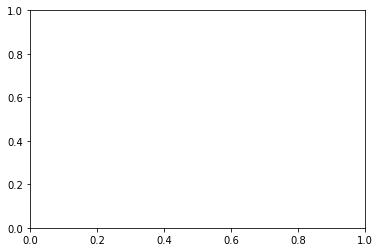

In [19]:
fig, axes = plt.subplots(1, 1)
for column in summary_expt.columns:
    # print(column)
    print(column[0], column[1], column[2])
    # axes.set_title(column[0])
    # print(summary_expt.loc[:, (column[1], column[2])])
    # print(summary_expt.xs(column[1], axis=1, level=1))
    summary = summary_expt.xs(column[1], axis=1, level=1).xs(column[2], axis=1, level=1)
    # print(summary.columns)
    print(summary)
    axes.plot(x=summary["timesteps_total"], y=summary_expt.xs(column[1], axis=1, level=1).xs(column[2], axis=1, level=1), label=summary.columns)
    break

axes.legend()

In [5]:
summary_expt.xs("")

KeyError: ''

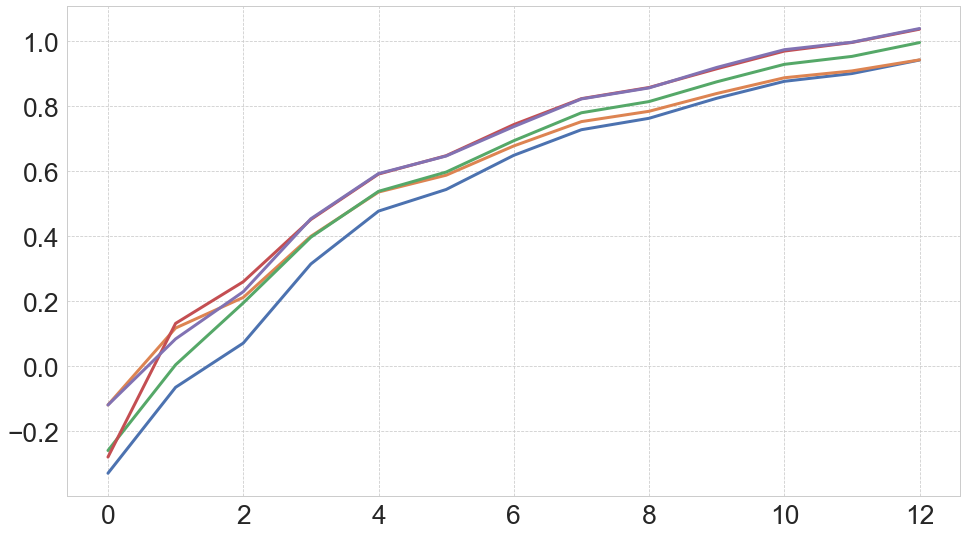

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9))
axes.plot(summary_expt.loc[: , pd.IndexSlice["PPO_BuySell", :, "episode_reward_mean"]])

<AxesSubplot:>

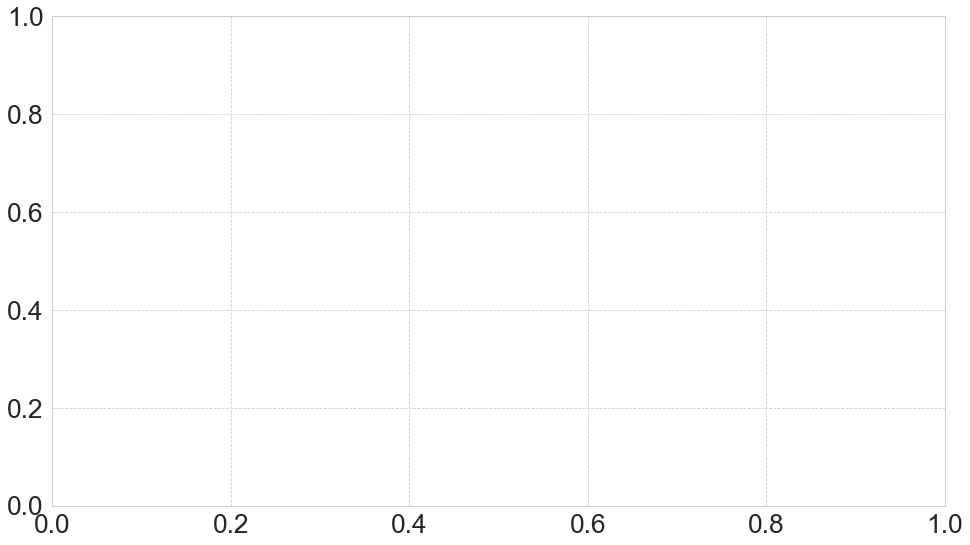

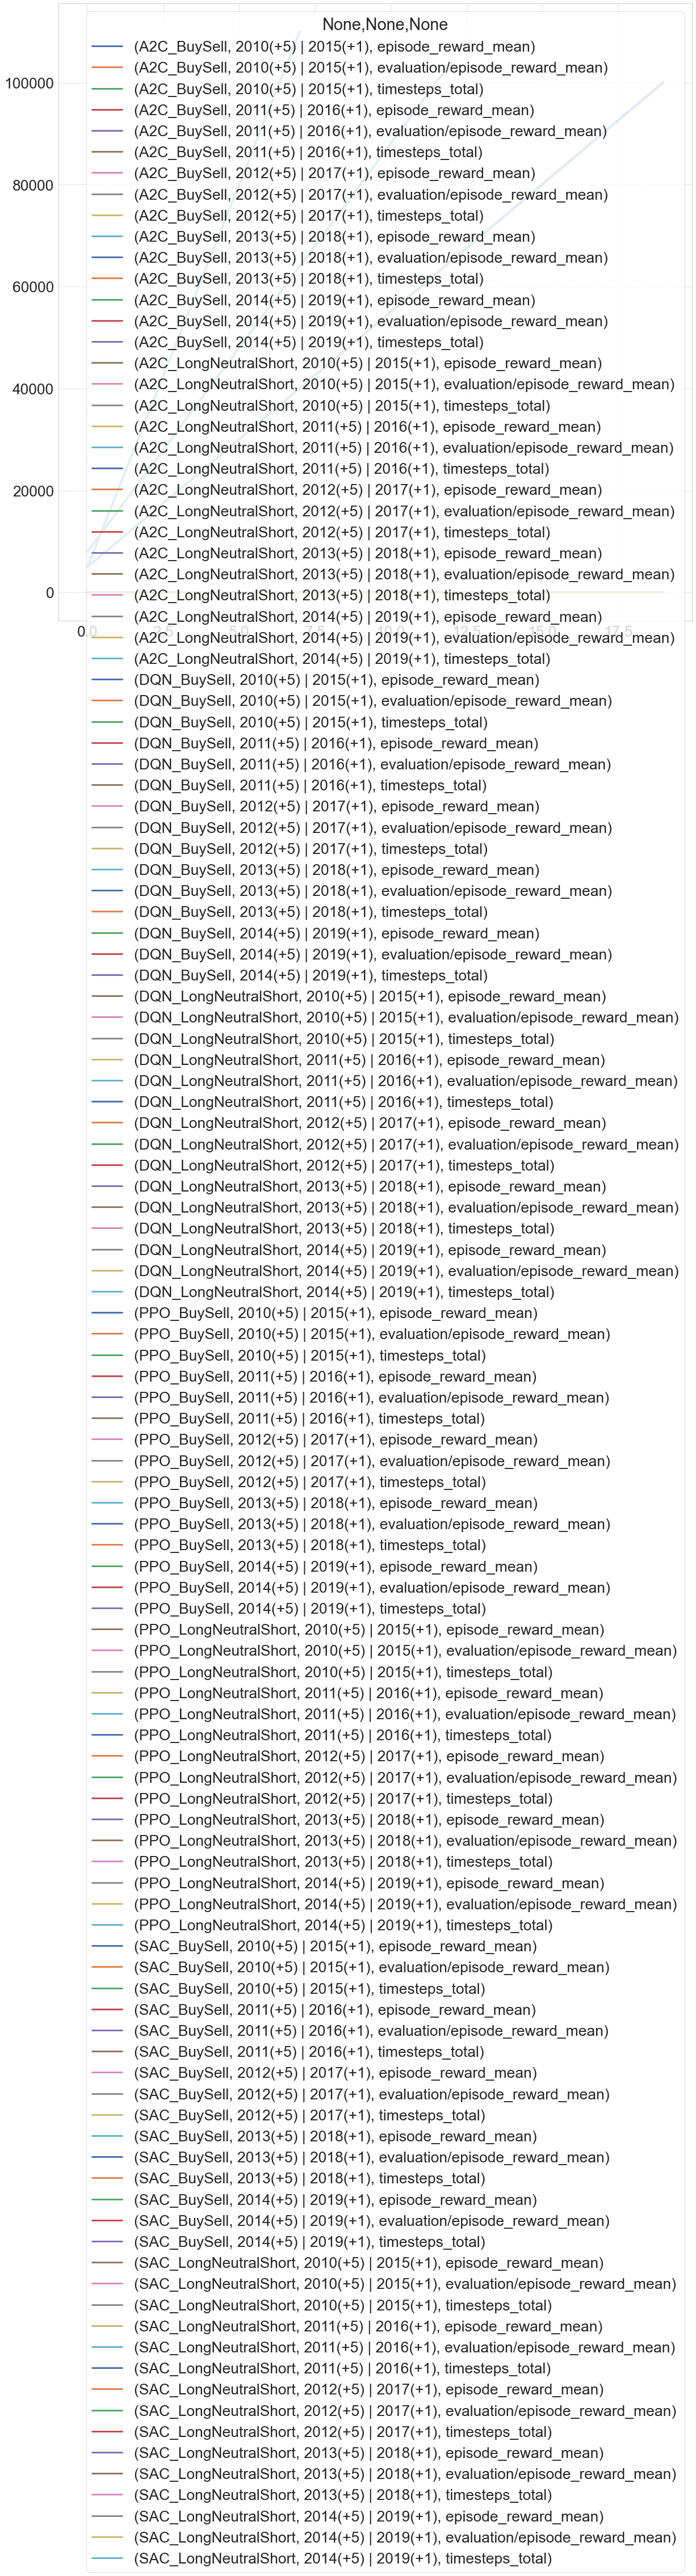

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9))

In [ ]:
summary_progress

{'DQN': {'BuySell': {'epidoe_reward_mean':     episode_reward_mean  episode_reward_mean  episode_reward_mean  \
   0             -0.185851            -0.224722            -0.258231   
   1             -0.010304            -0.328939            -0.077050   
   2              0.045864            -0.360402            -0.051816   
   3              0.104632            -0.267625             0.023339   
   4              0.104414            -0.207028            -0.008014   
   5              0.033443            -0.203131             0.050026   
   6              0.048487            -0.156234             0.002062   
   7              0.058156            -0.127571             0.013039   
   8              0.055712            -0.152640             0.020616   
   9              0.076417            -0.104212            -0.002079   
   10             0.108378            -0.074664            -0.005403   
   11             0.112638            -0.068140            -0.006776   
   12             0.1266

In [ ]:
summary_progress = {}

path = os.path.join("./experiments/2021-11-09_14-37_DescTradingEnv/Trainer_DescTradingEnv_125c5_00000_0_2021-11-09_14-37-05", "progress.csv")
progress = pd.read_csv(path)
# summary_progress[algo] = progress[["episode_reward_mean", "evaluation/episode_reward_mean", "timesteps_total"]]
progress

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,evaluation/sampler_perf/mean_env_render_ms,info/learner/default_policy/learner_stats/allreduce_latency,info/learner/default_policy/learner_stats/cur_kl_coeff,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/total_loss,info/learner/default_policy/learner_stats/policy_loss,info/learner/default_policy/learner_stats/vf_loss,info/learner/default_policy/learner_stats/kl,info/learner/default_policy/learner_stats/entropy,info/learner/default_policy/learner_stats/entropy_coeff
0,0.396728,-0.814902,-0.165912,1218.666667,3.0,1.0,4000.0,4000.0,False,3.0,...,0.0,0.0,0.200000,0.00005,0.014132,-0.006508,0.020190,0.002253,0.690883,0.0
1,0.485353,-1.496657,-0.559203,1218.666667,3.0,1.0,8000.0,8000.0,False,6.0,...,0.0,0.0,0.100000,0.00005,0.025766,-0.001541,0.026522,0.007863,0.676396,0.0
2,0.717079,-1.744192,-0.496537,1218.666667,3.0,1.0,12000.0,12000.0,False,9.0,...,0.0,0.0,0.066667,0.00005,0.035579,-0.002956,0.038122,0.005860,0.682406,0.0
3,0.897416,-2.117442,-0.536381,1218.666667,4.0,1.0,16000.0,16000.0,True,13.0,...,0.0,0.0,0.058333,0.00005,0.022798,-0.006740,0.028977,0.013490,0.674871,0.0


In [ ]:
progress.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'agent_timesteps_total', 'done', 'episodes_total',
       'training_iteration', 'timestamp', 'time_this_iter_s', 'time_total_s',
       'pid', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'experiment_id', 'date', 'hostname',
       'node_ip', 'trial_id', 'sampler_perf/mean_raw_obs_processing_ms',
       'sampler_perf/mean_inference_ms',
       'sampler_perf/mean_action_processing_ms',
       'sampler_perf/mean_env_wait_ms', 'sampler_perf/mean_env_render_ms',
       'timers/sample_time_ms', 'timers/sample_throughput',
       'timers/load_time_ms', 'timers/load_throughput', 'timers/learn_time_ms',
       'timers/learn_throughput', 'timers/update_time_ms',
       'info/num_steps_sampled', 'info/num_agent_steps_sampled',
       'info/num_steps_trained', 'info/num_agent_steps_trained

In [ ]:
progress["node_ip"]

0    192.168.1.2
1    192.168.1.2
2    192.168.1.2
3    192.168.1.2
Name: node_ip, dtype: object